##
## AB test Analysis for a mobile game

Project Description

The data is about an A/B test with a mobile game, Cookie Cats.

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.


## 1. Read the data

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [397]:
data = pd.read_csv('AB_Test_Results.csv')

In [398]:
data.head(20)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
1,2423,control,0.00
2,9411,control,0.00
3,7311,control,0.00
4,6174,variant,0.00
5,2380,variant,0.00
6,2849,control,0.00
7,9168,control,0.00
8,6205,variant,0.00
9,7548,control,0.00


## 2. Data exploratory

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


### Check the sample size, and whether two samples are independent

In [400]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [401]:
data.groupby('VARIANT_NAME').agg({'USER_ID': 'nunique'})

# there are 3931 users in the control group and 3934 users in the variant group

,USER_ID
VARIANT_NAME,
control,3931
variant,3934


In [402]:
data.nunique()

# There is 6324 unique users in the dataset, but there a re about 8000 users in two groups
# There must be some users who have both variants

USER_ID         6324
VARIANT_NAME       2
REVENUE          101
dtype: int64

In [403]:
data_variant_count = pd.DataFrame(data.groupby('USER_ID').agg({'VARIANT_NAME': 'nunique'}))
data_variant_count.reset_index(inplace=True)
data_variant_count

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
...,...,...
6319,9993,1
6320,9995,1
6321,9996,2
6322,9998,1


In [404]:
data_variant_count.VARIANT_NAME.value_counts()
# there are 1541 users who have both variants and 4783 have only one variant

1    4783
2    1541
Name: VARIANT_NAME, dtype: int64

In [405]:
# get the users who have both variants, and the users who have only one variant
data_both_group = data_variant_count[data_variant_count['VARIANT_NAME'] == 2].USER_ID.to_list()
data_single_group = data_variant_count[data_variant_count['VARIANT_NAME'] == 1].USER_ID.to_list()

In [406]:
# get the data for both groups, and the data for single group
data_both = data[data.USER_ID.isin(data_both_group)]
data_single = data[data.USER_ID.isin(data_single_group)]

In [407]:
# check if the data is correct
len(data_both) + len(data_single) == len(data)

True

In [408]:
data = data_single.copy()
data.USER_ID.nunique()

4783

In [409]:
# We delete the users who have both variants
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       6070 non-null   int64  
 1   VARIANT_NAME  6070 non-null   object 
 2   REVENUE       6070 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 189.7+ KB


In [410]:
# divide them into two groups
data_variant = data[data.VARIANT_NAME == 'variant']
data_control = data[data.VARIANT_NAME == 'control']

### Let's look at the revenue distribution

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

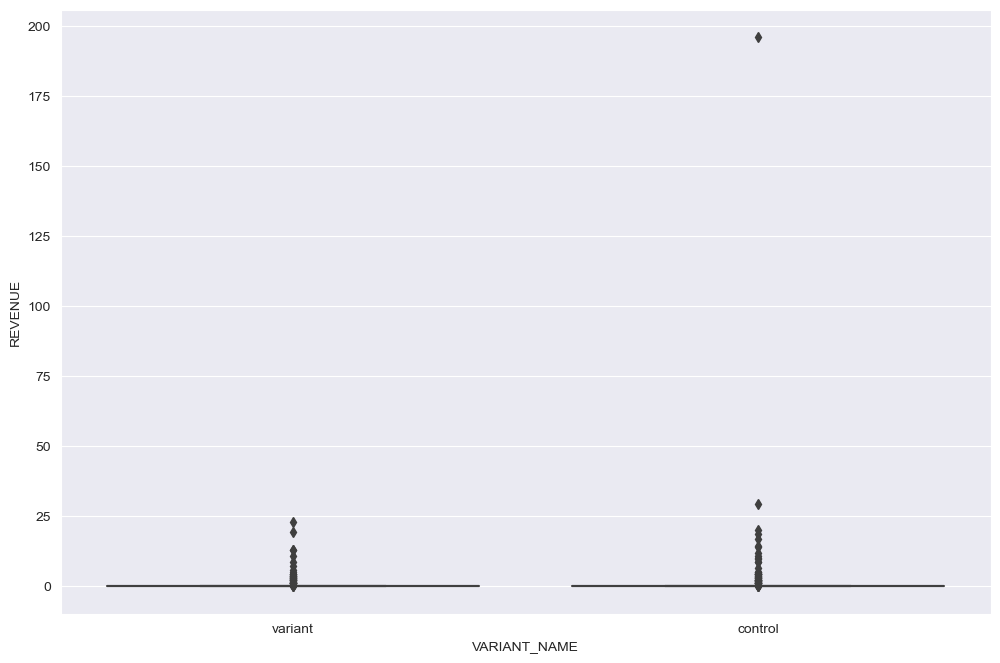

In [411]:
# plot the distribution of the revenue

plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)

In [412]:
# check if there are outliers, and how many outliers are there

data.REVENUE.describe()

# with the 6070 rows, the max value is 196.01, and the min value is 0

count    6070.000000
mean        0.107064
std         2.673501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

In [413]:
# check the outliers, and how many outliers are there
data.sort_values(ascending=False, by='REVENUE').head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56
758,4445,control,17.05
4031,2059,control,14.24
9019,1973,control,14.07
4561,4966,variant,12.99


In [414]:
# check the users who have the max revenue
data[data.USER_ID == 3342]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


In [415]:
# check the users whose revenue larger than 30
data[data['REVENUE'] >= 30].index.to_list()

[1437]

In [416]:
# drop outliers
data.drop(data[data['REVENUE'] >= 30].index.to_list(), inplace=True)

Text(0.5, 1.0, 'Distribution of revenue by groups')

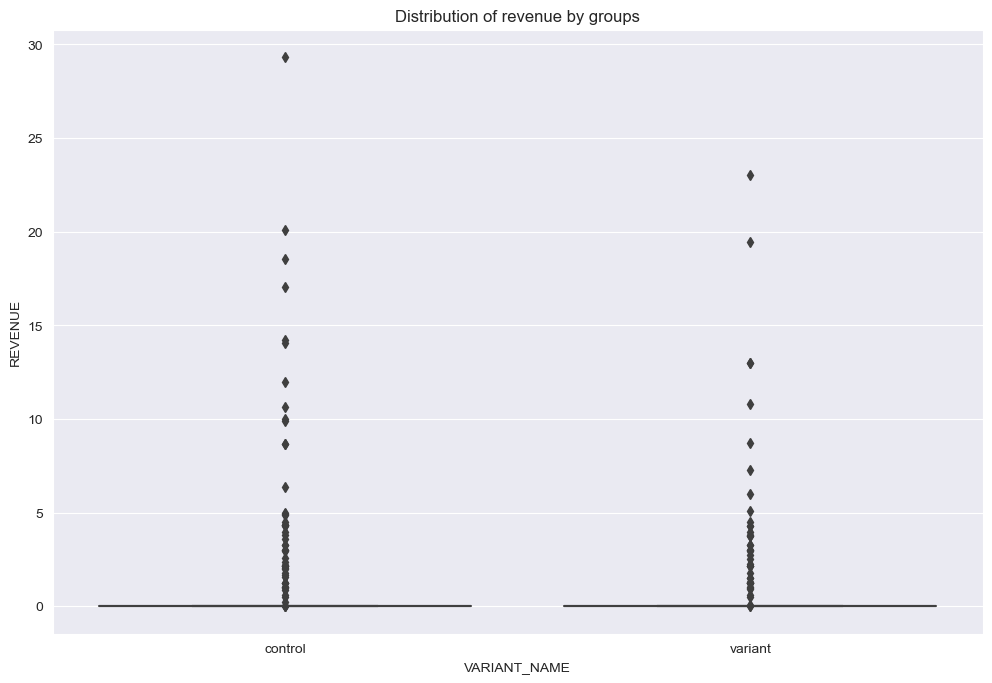

In [417]:
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data, order=['control', 'variant'])

plt.title('Distribution of revenue by groups')

In [418]:
# ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
# plt.figure(figsize=(12, 8), dpi=100)
# 
# sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_single, ax=fig[0]).set_title('Single variant users')
# sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_both, ax=fig[1]).set_title('Double variant users')

Text(0.5, 1.0, 'Two groups without 0 revenue')

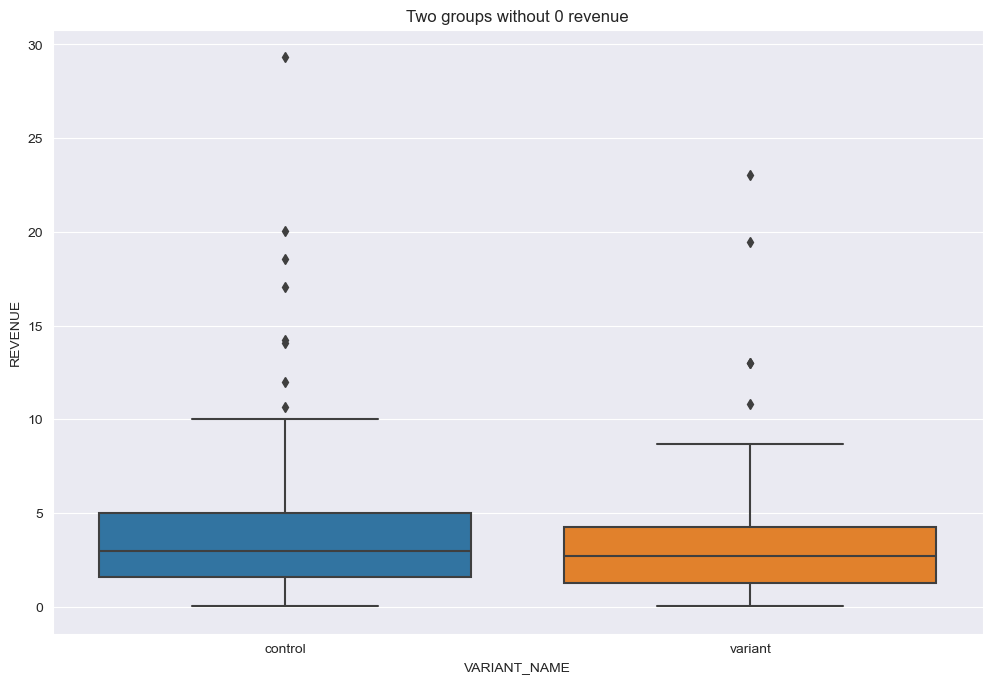

In [419]:
# exclude the users with 0 revenue

# ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data[data.REVENUE > 0],
            order=['control', 'variant'])

plt.title('Two groups without 0 revenue')

# We could see that the variant group has higher revenue than the control group when we exclude the users with 0 revenue

Text(0.5, 1.0, 'Two groups without 0 revenue')

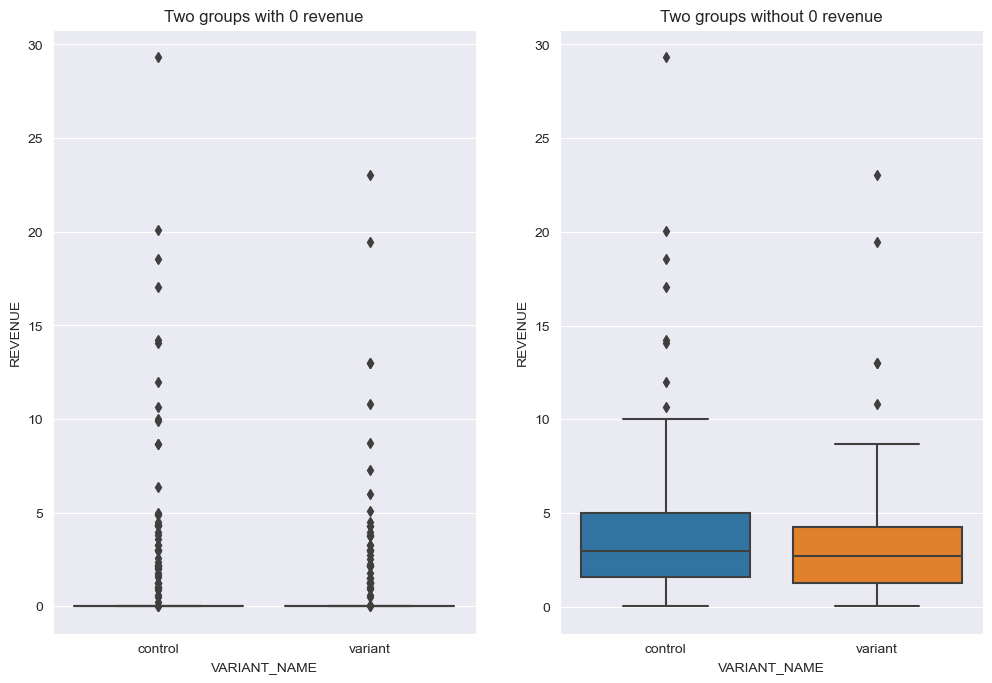

<Figure size 1200x800 with 0 Axes>

In [420]:
ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data,
            ax=fig[0], order=['control', 'variant']).set_title('Two groups with 0 revenue')

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data[data.REVENUE > 0],
            ax=fig[1], order=['control', 'variant']).set_title('Two groups without 0 revenue')

In [421]:
# check the distribution of the revenue without 0 values
data.loc[data.REVENUE != 0, 'REVENUE'].describe()

count    96.000000
mean      4.727812
std       5.508521
min       0.020000
25%       1.250000
50%       2.970000
75%       4.890000
max      29.320000
Name: REVENUE, dtype: float64

In [422]:
data = data.groupby(by=['USER_ID', 'VARIANT_NAME']).agg({'REVENUE': 'sum'}).reset_index()
data

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       4782 non-null   int64  
 1   VARIANT_NAME  4782 non-null   object 
 2   REVENUE       4782 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 112.2+ KB


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

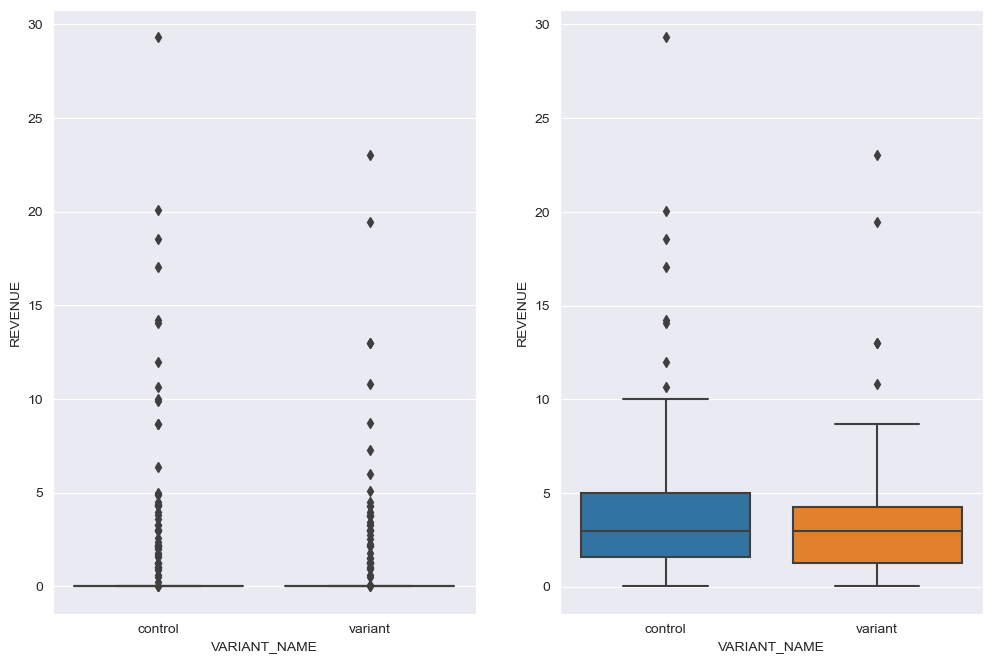

In [424]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
sns.boxplot(ax=ax[0], x='VARIANT_NAME', y='REVENUE', data=data, order=['control', 'variant'])
sns.boxplot(ax=ax[1], x='VARIANT_NAME', y='REVENUE', data=data[data.REVENUE > 0], order=['control', 'variant'])

## 3. Metrics Analysis

Generate the metrics

In [425]:
all_stat = data.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                                'REVENUE': ['sum', 'mean', 'median', 'count']})

all_stat

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         2389  274.55  0.114923    0.0  2389
variant         2393  179.32  0.074935    0.0  2393

In [426]:
orders_per_user = all_stat.loc[:, ('REVENUE', 'count')] / all_stat.loc[:, ('USER_ID', 'nunique')]
revenue_per_user = all_stat.loc[:, ('REVENUE', 'sum')] / all_stat.loc[:, ('USER_ID', 'nunique')]

In [427]:
all_stat['orders_per_user'] = orders_per_user
all_stat['revenue_per_user'] = revenue_per_user

all_stat

USER_ID REVENUE                        orders_per_user  \
             nunique     sum      mean median count                   
VARIANT_NAME                                                          
control         2389  274.55  0.114923    0.0  2389             1.0   
variant         2393  179.32  0.074935    0.0  2393             1.0   

             revenue_per_user  
                               
VARIANT_NAME                   
control              0.114923  
variant              0.074935

In [428]:
# get metrics by groups

paid_stat = data_single.loc[data_single.REVENUE != 0].groupby('VARIANT_NAME').agg({'USER_ID': 'nunique',
                                                                                   'REVENUE': ['sum', 'mean', 'median',
                                                                                               'count']})

orders_per_user = paid_stat.loc[:, ('REVENUE', 'count')] / paid_stat.loc[:, ('USER_ID', 'nunique')]
revenue_per_user = paid_stat.loc[:, ('REVENUE', 'sum')] / paid_stat.loc[:, ('USER_ID', 'nunique')]

paid_stat['orders_per_user'] = orders_per_user
paid_stat['revenue_per_user'] = revenue_per_user

In [429]:
paid_stat

USER_ID REVENUE                        orders_per_user  \
             nunique     sum      mean median count                   
VARIANT_NAME                                                          
control           54  470.56  8.714074   3.12    54         1.00000   
variant           42  179.32  4.170233   2.72    43         1.02381   

             revenue_per_user  
                               
VARIANT_NAME                   
control              8.714074  
variant              4.269524

In [430]:
data

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


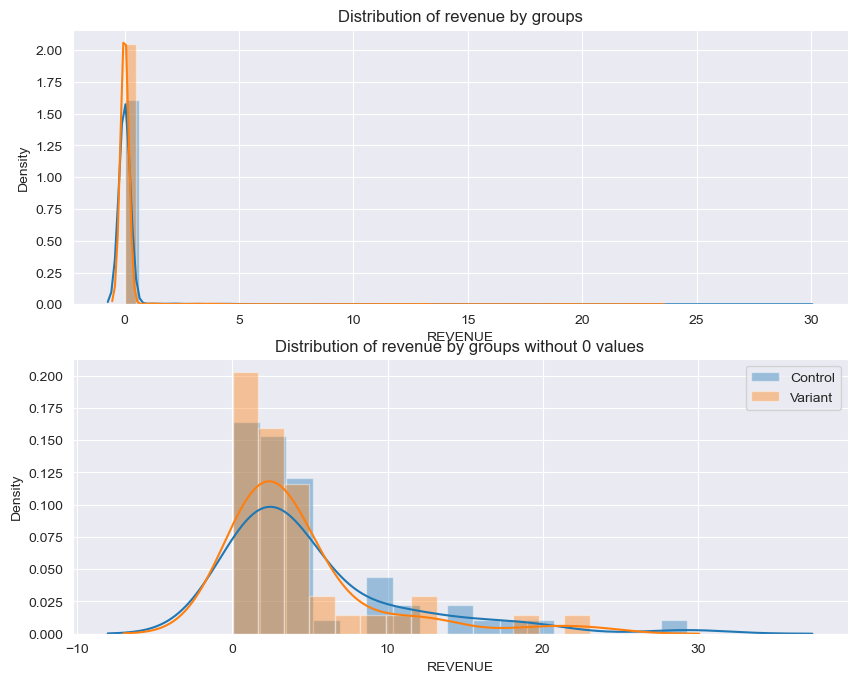

In [431]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=100)
# build graphs for all users
sns.distplot(data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE'], ax=ax[0], label='Control')
sns.distplot(data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE'], ax=ax[0], label='Variant')

ax[0].set_title('Distribution of revenue by groups')

sns.distplot(data.loc[(data['VARIANT_NAME'] == 'control') & (data['REVENUE'] > 0), 'REVENUE'],
             ax=ax[1], label='Control')
sns.distplot(data.loc[(data['VARIANT_NAME'] == 'variant') & (data['REVENUE'] > 0), 'REVENUE'],
             ax=ax[1], label='Variant')

ax[1].set_title('Distribution of revenue by groups without 0 values')

plt.legend()

## 4. Statistical analysis

### Check the normality of the data

In [432]:
# check if the data is normally distributed
from scipy.stats import shapiro

In [433]:
stat, p_value = shapiro(data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.075, p=0.000
The data is not normally distributed


In [434]:
stat, p_value = shapiro(data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.061, p=0.000
The data is not normally distributed


In [435]:
# Anderson-Darling test
from scipy.stats import anderson

result = anderson(data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE'])
print('Statistic: %.3f' % result.statistic)

if result.statistic > result.critical_values[2]:
    print('Probably not normally distributed')
else:
    print('Probably normally distributed')

Statistic: 874.562
Probably not normally distributed


In [436]:
result = anderson(data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE'])
print('Statistic: %.3f' % result.statistic)

if result.statistic > result.critical_values[2]:
    print('Probably not normally distributed')
else:
    print('Probably normally distributed')

Statistic: 884.698
Probably not normally distributed


The data is not normally distributed, so we choose the non-parametric test, Mann-Whitney U test

### Mann-Whitney U test

In [437]:
from scipy.stats import mannwhitneyu

In [438]:
# H0 - the distributions of the two groups are the same
# H1 - the distributions of the two groups are different

stat, p_value = mannwhitneyu(data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE'],
                             data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE'])

In [439]:
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution, we can not reject H0')
else:
    print('Probably different distributions, we can reject H0')

Statistics=2871768.000, p=0.248
Probably the same distribution, we can not reject H0


In [440]:
# let's check the data without 0 values

stat, p_value = mannwhitneyu(data.loc[(data['VARIANT_NAME'] == 'control') & (data['REVENUE'] > 0),
'REVENUE'],
                             data.loc[(data_single['VARIANT_NAME'] == 'variant') & (data['REVENUE'] > 0),
                             'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution, we can not reject H0')
else:
    print('Probably different distributions, we can reject H0')

Statistics=560.500, p=0.409
Probably the same distribution, we can not reject H0


## 5. Bootstrap

Let us use the bootstrap to get the confidence interval for the difference between the means

In [441]:
# Use the bootstrap to get the confidence interval
from sklearn.utils import resample

In [442]:
# prepare bootstrap sample
control = data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE']
variant = data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE']

In [443]:
## define the bootstrap

def get_bootstrap(data, n_samples=1000):
    samples = np.array([np.random.choice(data, size=len(data), replace=True) for _ in range(n_samples)])
    return samples

In [444]:
# run bootstrap

sample_control = get_bootstrap(control)
sample_variant = get_bootstrap(variant)
sample_variant_paid = get_bootstrap(data.loc[data['REVENUE'] > 0, 'REVENUE'])
sample_control_paid = get_bootstrap(data.loc[data['REVENUE'] > 0, 'REVENUE'])

In [445]:
sample_control[0:3, 0:]

array([[0.  , 0.  , 9.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.23, 0.  , 0.  ]])

In [446]:
sample_control_paid[0:3, 0:]

array([[6.000e-01, 7.270e+00, 1.250e+00, 3.750e+00, 5.000e-01, 5.800e-01,
        1.250e+00, 1.063e+01, 2.160e+00, 1.300e+00, 3.250e+00, 8.660e+00,
        2.990e+00, 2.010e+00, 6.000e-01, 3.980e+00, 1.856e+01, 2.270e+00,
        1.010e+00, 3.250e+00, 3.750e+00, 4.330e+00, 2.270e+00, 1.780e+00,
        1.250e+00, 2.170e+00, 5.000e-01, 1.660e+00, 3.000e+00, 4.520e+00,
        6.350e+00, 2.170e+00, 4.520e+00, 1.947e+01, 4.330e+00, 2.170e+00,
        5.000e-01, 2.720e+00, 9.000e-01, 5.980e+00, 4.330e+00, 1.424e+01,
        2.170e+00, 8.600e-01, 1.000e+00, 4.000e-02, 7.270e+00, 3.000e+00,
        1.250e+00, 1.010e+00, 3.750e+00, 3.580e+00, 1.250e+00, 3.980e+00,
        1.010e+00, 2.500e+00, 1.856e+01, 4.000e-02, 3.980e+00, 1.299e+01,
        5.980e+00, 4.270e+00, 1.424e+01, 2.140e+00, 2.140e+00, 1.947e+01,
        1.510e+00, 2.500e+00, 5.080e+00, 4.330e+00, 2.720e+00, 2.170e+00,
        2.007e+01, 1.299e+01, 2.600e+00, 4.950e+00, 1.299e+01, 1.750e+00,
        2.007e+01, 6.000e-02, 3.990e+0

Text(0.5, 0, 'Mean')

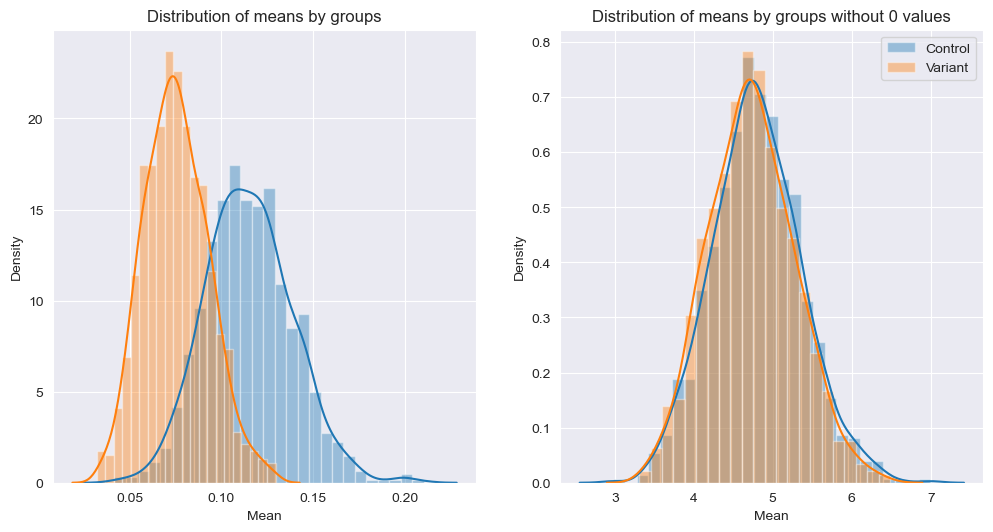

In [447]:
# plot the distribution of the means

figs, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

sns.distplot(sample_control.mean(axis=1), ax=axes[0], label='Control')
sns.distplot(sample_variant.mean(axis=1), ax=axes[0], label='Variant')

sns.distplot(sample_control_paid.mean(axis=1), ax=axes[1], label='Control')
sns.distplot(sample_variant_paid.mean(axis=1), ax=axes[1], label='Variant')

# set titles
axes[0].set_title('Distribution of means by groups')
axes[1].set_title('Distribution of means by groups without 0 values')

plt.legend()

axes[0].set_xlabel('Mean')
axes[1].set_xlabel('Mean')



In [448]:
# get the confidence interval

def get_confidence_interval(data, alpha=0.95):
    lower = np.percentile(data, (1 - alpha) / 2 * 100)
    upper = np.percentile(data, (1 + alpha) / 2 * 100)
    return lower, upper

In [449]:
# get the confidence interval for the means

lower_control, upper_control = get_confidence_interval(sample_control.mean(axis=1))
lower_variant, upper_variant = get_confidence_interval(sample_variant.mean(axis=1))

lower_control_paid, upper_control_paid = get_confidence_interval(sample_control_paid.mean(axis=1))
lower_variant_paid, upper_variant_paid = get_confidence_interval(sample_variant_paid.mean(axis=1))

In [450]:
print('Confidence interval for the control group: [{:.3f}, {:.3f}]'.format(lower_control, upper_control))
print('Confidence interval for the variant group: [{:.3f}, {:.3f}]'.format(lower_variant, upper_variant))
print('Confidence interval for the control group without 0 values: [{:.3f}, {:.3f}]'.format(lower_control_paid,
                                                                                            upper_control_paid))
print('Confidence interval for the variant group without 0 values: [{:.3f}, {:.3f}]'.format(lower_variant_paid,
                                                                                            upper_variant_paid))

print('----------------------DIVIDED-------------------------')

if lower_control > upper_variant:
    print('The difference between the means is significant')
else:
    print('The difference between the means is not significant')

    # the difference between the means is not significant

Confidence interval for the control group: [0.073, 0.163]
Confidence interval for the variant group: [0.044, 0.112]
Confidence interval for the control group without 0 values: [3.726, 5.985]
Confidence interval for the variant group without 0 values: [3.690, 5.820]
----------------------DIVIDED-------------------------
The difference between the means is not significant


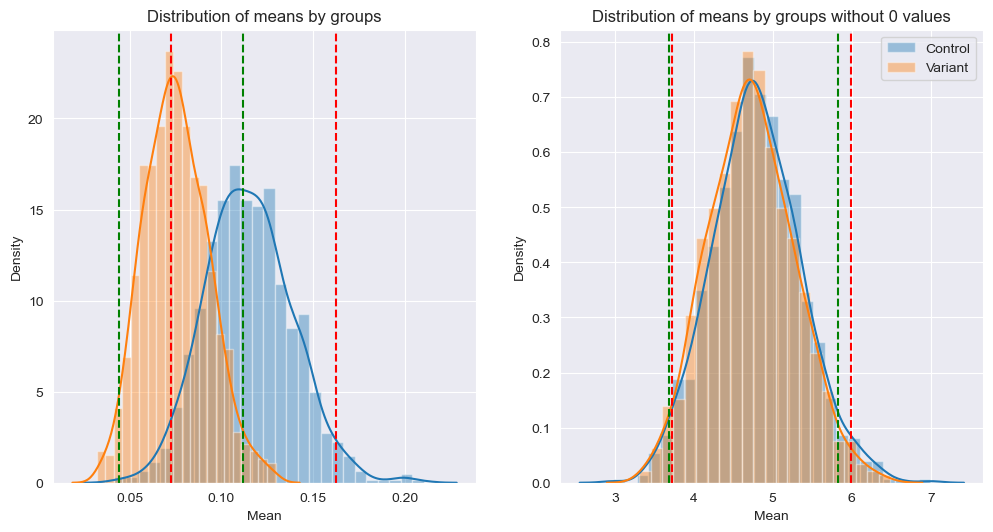

In [451]:
# plot the confidence interval for each group

figs, axes = plt.subplots(1, 2, dpi=100, figsize=(12, 6))

sns.distplot(sample_control.mean(axis=1), ax=axes[0], label='Control')
sns.distplot(sample_variant.mean(axis=1), ax=axes[0], label='Variant')

sns.distplot(sample_control_paid.mean(axis=1), ax=axes[1], label='Control')
sns.distplot(sample_variant_paid.mean(axis=1), ax=axes[1], label='Variant')

# set titles

axes[0].set_title('Distribution of means by groups')
axes[1].set_title('Distribution of means by groups without 0 values')

plt.legend()

axes[0].set_xlabel('Mean')
axes[1].set_xlabel('Mean')

# plot the confidence interval

axes[0].axvline(lower_control, color='red', linestyle='--')
axes[0].axvline(upper_control, color='red', linestyle='--')

axes[1].axvline(lower_control_paid, color='red', linestyle='--')
axes[1].axvline(upper_control_paid, color='red', linestyle='--')

axes[0].axvline(lower_variant, color='green', linestyle='--')
axes[0].axvline(upper_variant, color='green', linestyle='--')

axes[1].axvline(lower_variant_paid, color='green', linestyle='--')
axes[1].axvline(upper_variant_paid, color='green', linestyle='--')

In [452]:
# get the confidence interval for the difference between the means

diff = sample_variant.mean(axis=1) - sample_control.mean(axis=1)
diff_paid = sample_variant_paid.mean(axis=1) - sample_control_paid.mean(axis=1)

print('Confidence interval for the difference between the means: [{:.3f}, {:.3f}]'.format(*get_confidence_interval(
    diff)))
print('Confidence interval for the difference between the means without 0 values: [{:.3f}, {:.3f}]'.format(
    *get_confidence_interval(diff_paid)))

print('----------------------DIVIDED-------------------------')

if get_confidence_interval(diff)[0] > get_confidence_interval(diff)[1]:
    print('The difference between the means is significant')
else:
    print('The difference between the means is not significant')

    # the difference between the means is not significant

Confidence interval for the difference between the means: [-0.096, 0.019]
Confidence interval for the difference between the means without 0 values: [-1.583, 1.514]
----------------------DIVIDED-------------------------
The difference between the means is not significant


In [453]:
# Conclusion: the difference between the means is not significant
# the difference between the means without 0 values is significant
# the variant group has higher revenue than the control group
# the variant group has higher revenue than the control group without 0 values

## T-test

In [454]:
# get the confidence interval for the difference between the means
control_bootstrap_means = [sample.mean() for sample in sample_control]
variant_bootstrap_means = [sample.mean() for sample in sample_variant]

control_bootstrap_means_paid = [sample.mean() for sample in sample_control_paid]
variant_bootstrap_means_paid = [sample.mean() for sample in sample_variant_paid]

In [455]:
# check the normality of the data

# H0 - the data is normally distributed
# H1 - the data is not normally distributed

stat, p_value = shapiro(control_bootstrap_means)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.995, p=0.001
The data is not normally distributed


In [456]:
stat, p_value = shapiro(variant_bootstrap_means)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.994, p=0.000
The data is not normally distributed


In [457]:
stat, p_value = shapiro(control_bootstrap_means_paid)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

stat, p_value = shapiro(variant_bootstrap_means_paid)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.997, p=0.109
The data is normally distributed
Statistics=0.997, p=0.073
The data is normally distributed


According to the Shapiro-Wilk test, the data is not normally distributed, so we can't use the t-test

In [461]:
# H0 - the distributions of the two groups are the same
# H1 - the distributions of the two groups are different

# Calculate the pooled std

pooled_std = np.sqrt((np.std(control_bootstrap_means) ** 2 + np.std(variant_bootstrap_means) ** 2) / 2)
# pooled_std_1 = np.sqrt((np.var(control_bootstrap_means) + np.var(variant_bootstrap_means)) / 2)

print('Pooled std: {:.3f}'.format(pooled_std))

# Calculate the t-statistic

t_stat = (np.mean(control_bootstrap_means) - np.mean(variant_bootstrap_means)) / pooled_std

print(f"T-statistic: {t_stat}")

# Calculate the p_value

from scipy.stats import t

p_value = (1 - t.cdf(t_stat, df=len(control_bootstrap_means) + len(variant_bootstrap_means) - 2)) * 2

print('Statistics=%.3f, p=%.3f' % (t_stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution, we can not reject H0')
else:
    print('Probably different distributions, we can reject H0')

Pooled std: 0.021
T-statistic: 1.8907517654257402
Statistics=1.891, p=0.059
Probably the same distribution, we can not reject H0
